# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = [i for i in range(1,11)]
Y = [1.65,3.45,6.54,9.42,11.35,13.30,16,18.60,20.56,22.95]

df = pd.DataFrame(data={'X':X,'Y':Y})
df

,X,Y
0,1,1.65
1,2,3.45
2,3,6.54
3,4,9.42
4,5,11.35
5,6,13.30
6,7,16.00
7,8,18.60
8,9,20.56
9,10,22.95


$$m = \frac{n\sum x*y - \sum x\sum y}{n\sum x^{2} - (\sum x)^{2}}$$

In [3]:
df['XY'] = df['X'] * df['Y']
df['X^2'] = df['X'] ** 2
df

,X,Y,XY,X^2
0,1,1.65,1.65,1
1,2,3.45,6.90,4
2,3,6.54,19.62,9
3,4,9.42,37.68,16
4,5,11.35,56.75,25
5,6,13.30,79.80,36
6,7,16.00,112.00,49
7,8,18.60,148.80,64
8,9,20.56,185.04,81
9,10,22.95,229.50,100


In [4]:
n = len(df)
sum_xy = df['XY'].sum()
sum_x = df['X'].sum()
sum_y = df['Y'].sum()
sum_x_2 = df['X^2'].sum()
sum_x_h_2 = sum_x ** 2

In [5]:
print(n, sum_xy, sum_x, sum_y, sum_x_2, sum_x_h_2)

10 877.74 55 123.82000000000001 385 3025


In [6]:
numerator_m = (n*(sum_xy)) - (sum_x * sum_y)
denominator_m = (n * sum_x_2) - (sum_x_h_2)

In [7]:
numerator_m, denominator_m

(1967.2999999999993, 825)

In [8]:
m = numerator_m / denominator_m
m

2.3846060606060595

$$b = \frac{\sum y - m * \sum x}{n}$$

In [9]:
numerator_b = sum_y - (m * sum_x) 
denominator_b = len(df)

In [10]:
b = numerator_b / denominator_b
b

-0.7333333333333272

$$y_{pred} = m\sum_{i=1}^{n}X + b$$

In [11]:
y_pred = [round((m * Xi + b), 2) for Xi in df['X']]
y_pred

[1.65, 4.04, 6.42, 8.81, 11.19, 13.57, 15.96, 18.34, 20.73, 23.11]

$$squarederror = \sum_{i=0}^{n} (y_{pred} - y_{orig})^{2}$$

In [12]:
squarederror = sum([(y_pred_value - y_orig_value) ** 2 
               for y_pred_value, y_orig_value in zip(y_pred, df['Y'].values)])
squarederror

0.9568000000000004

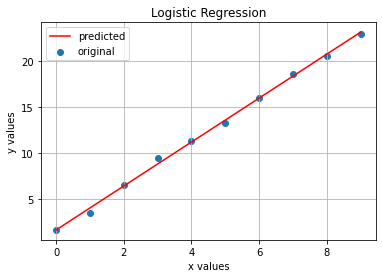

In [13]:
plt.scatter(list(range(len(df))), df['Y'].values, label='original')
plt.plot(list(range(len(df))), y_pred, c='r', label='predicted')
plt.title("Logistic Regression")
plt.xlabel("x values")
plt.ylabel("y values")
plt.grid()
plt.legend()
plt.show()

In [14]:
class m_value:        
    def __init__(self, n, sum_xy, sum_x, sum_y, sum_x_2, sum_x_h_2):
        self.numerator_m = (n*(sum_xy)) - (sum_x * sum_y)
        self.denominator_m = (n * sum_x_2) - (sum_x_h_2)
    def A(self):
        value = numerator_m / denominator_m
        return value
m = m_value(n, sum_xy, sum_x, sum_y, sum_x_2, sum_x_h_2)
m = m.A()
print(m)

2.3846060606060595


In [15]:
class b_value:
    def __init__(self, m, sum_y, sum_x, n):
        self.numerator_b = sum_y - (m * sum_x) 
        self.denominator_b = n
    def B(self):
        self.value = self.numerator_b / denominator_b
        return self.value
b = b_value(m, sum_y, sum_x, n)  
b = b.B()
print(b)

-0.7333333333333272


In [16]:
class final_value:
    def __init__(self, m, X, b):
        self.y_pred = [round((m * Xi + b), 2) for Xi in df['X']]
    def PrintYpred(self): 
        return self.y_pred
ypred = final_value(m, X, b)   
ypred = ypred.PrintYpred()
print(ypred)

[1.65, 4.04, 6.42, 8.81, 11.19, 13.57, 15.96, 18.34, 20.73, 23.11]


In [17]:
class Squarederror:
    def __init__(self, ypred, Y):
        self.SE = sum([(y_pred_value - y_orig_value) ** 2 
               for y_pred_value, y_orig_value in zip(y_pred, df['Y'].values)])
    def Error(self):
        return self.SE
squared_error = Squarederror(ypred, Y)
squared_error = squared_error.Error()
print(squared_error)

0.9568000000000004


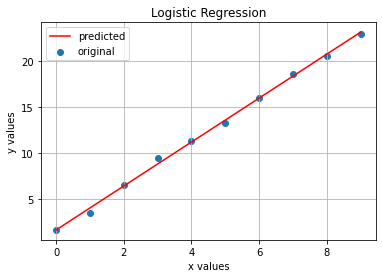

In [18]:
class graph:
    def __init__(self, df, ypred):
        plt.scatter(list(range(len(df))), df['Y'].values, label='original')
        plt.plot(list(range(len(df))), y_pred, c='r', label='predicted')
        plt.title("Logistic Regression")
        plt.xlabel("x values")
        plt.ylabel("y values")
        plt.grid()
        plt.legend()
        plt.show()
Graph = graph(df, ypred)  